Name: Smita Gupta<br>
USC ID: 4123927261

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
import warnings
import os
import xgboost as xgb
import matplotlib.pyplot
import weka.core.jvm as jvm
jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from math import sqrt, floor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
%matplotlib inline

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


2. Tree-Based Methods<br>
(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [3]:
#Setting the paths 
aps_train = "Homework 4 Data/aps_failure_training_set.csv"
aps_test = "Homework 4 Data/aps_failure_test_set.csv"

In [23]:
#Column names for aps dataset
aps_columns = ["class","aa_000","ab_000","ac_000","ad_000","ae_000","af_000","ag_000","ag_001","ag_002","ag_003",
               "ag_004","ag_005","ag_006","ag_007","ag_008","ag_009","ah_000","ai_000","aj_000","ak_000","al_000",
               "am_0","an_000","ao_000","ap_000","aq_000","ar_000","as_000","at_000","au_000","av_000","ax_000",
               "ay_000","ay_001","ay_002","ay_003","ay_004","ay_005","ay_006","ay_007","ay_008","ay_009","az_000",
               "az_001","az_002","az_003","az_004","az_005","az_006","az_007","az_008","az_009","ba_000","ba_001",
               "ba_002","ba_003","ba_004","ba_005","ba_006","ba_007","ba_008","ba_009","bb_000","bc_000","bd_000",
               "be_000","bf_000","bg_000","bh_000","bi_000","bj_000","bk_000","bl_000","bm_000","bn_000","bo_000",
               "bp_000","bq_000","br_000","bs_000","bt_000","bu_000","bv_000","bx_000","by_000","bz_000","ca_000",
               "cb_000","cc_000","cd_000","ce_000","cf_000","cg_000","ch_000","ci_000","cj_000","ck_000","cl_000",
               "cm_000","cn_000","cn_001","cn_002","cn_003","cn_004","cn_005","cn_006","cn_007","cn_008","cn_009",
               "co_000","cp_000","cq_000","cr_000","cs_000","cs_001","cs_002","cs_003","cs_004","cs_005","cs_006",
               "cs_007","cs_008","cs_009","ct_000","cu_000","cv_000","cx_000","cy_000","cz_000","da_000","db_000",
               "dc_000","dd_000","de_000","df_000","dg_000","dh_000","di_000","dj_000","dk_000","dl_000","dm_000",
               "dn_000","do_000","dp_000","dq_000","dr_000","ds_000","dt_000","du_000","dv_000","dx_000","dy_000",
               "dz_000","ea_000","eb_000","ec_00","ed_000","ee_000","ee_001","ee_002","ee_003","ee_004","ee_005",
               "ee_006","ee_007","ee_008","ee_009","ef_000","eg_000"]

(b) Data Preparation<br>
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.<br>
<br>
i) Research what types of techniques are usually used for dealing with data with
missing values. Pick at least one of them and apply it to this data in the next steps.

In [24]:
X_data, y_data = load_data(aps_train, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True, dropOrNot=False)
print(X_data.head())
print(y_data.head())

# existence larger than 2/3 use mean strategy
missing_columns = X_data.columns[X_data.isnull().any()]
print(X_data[missing_columns].describe())

   aa_000 ab_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0   76698    NaN  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1   33058    NaN  0.000000e+00  190620.639314     0.0     0.0     0.0     0.0   
2   41040    NaN  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3      12      0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4   60874    NaN  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0 

I have no idea how to impute these missing value, so I dropoed them. Even though I found other people replace by mean value,
I dont think it is a good idea. When there are nearly 60 percentage of data is missing, imputation by mean value wont
make any change. So, In the following questions, some of them I use 171 -10 = 161 columns data

2) b) ii) For each of the 170 features, calculate the coefficient of variation CV = ms ,
where s is sample standard deviation and m is sample mean.

In [26]:
def to_binary_numeric(y_data, classNeg="neg"):
    if isinstance(y_data, pd.DataFrame):
        y_data = y_data.to_numpy()

    y_data = np.array([1 if x == classNeg else 0 for x in y_data])
    return pd.DataFrame(y_data)

In [27]:
X_data, y_data = load_data(aps_train, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True, dropOrNot=True)

y_data = to_binary_numeric(y_data, classNeg="neg")
data = pd.concat([y_data, X_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())
print("The total {} features CV are (first 20 rows): \n {}".format(len(cvResult), cvResult[:20]))

The total 161 features CV are (first 20 rows): 
 [1.30188911e-01 2.45091715e+00 2.16974844e+00 1.83846088e+02
 2.31907434e+01 1.86587656e+01 9.18777990e+01 3.48546596e+01
 1.73689987e+01 8.54997778e+00 5.40143368e+00 2.92706769e+00
 2.34490753e+00 2.83346048e+00 6.15453179e+00 3.29840762e+01
 2.30016808e+00 1.80125316e+01 4.38014574e+01 7.45260669e+01]


2) b) iii) Plot a correlation matrix for your features using pandas or any other tool.

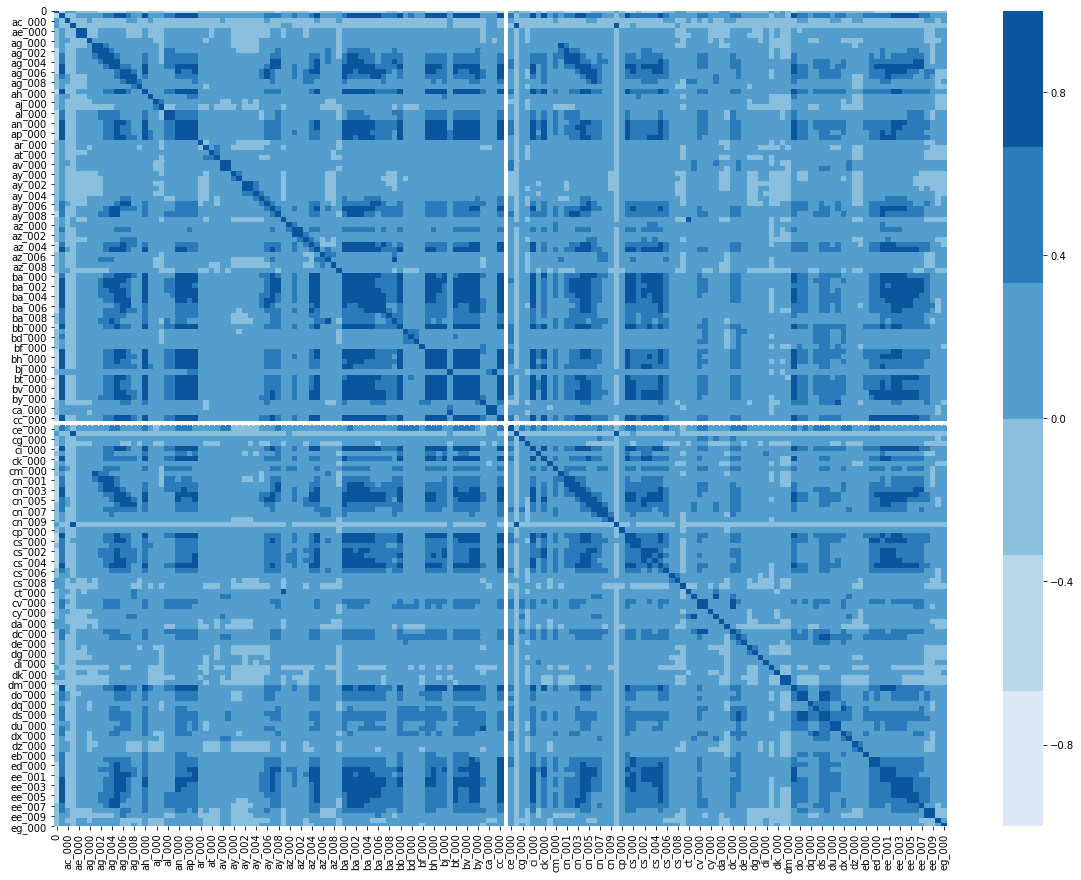

In [28]:
#Plotting correlation matrix
correlation = data.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

2) b) iv) Pick floor(sqrt(170)) features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

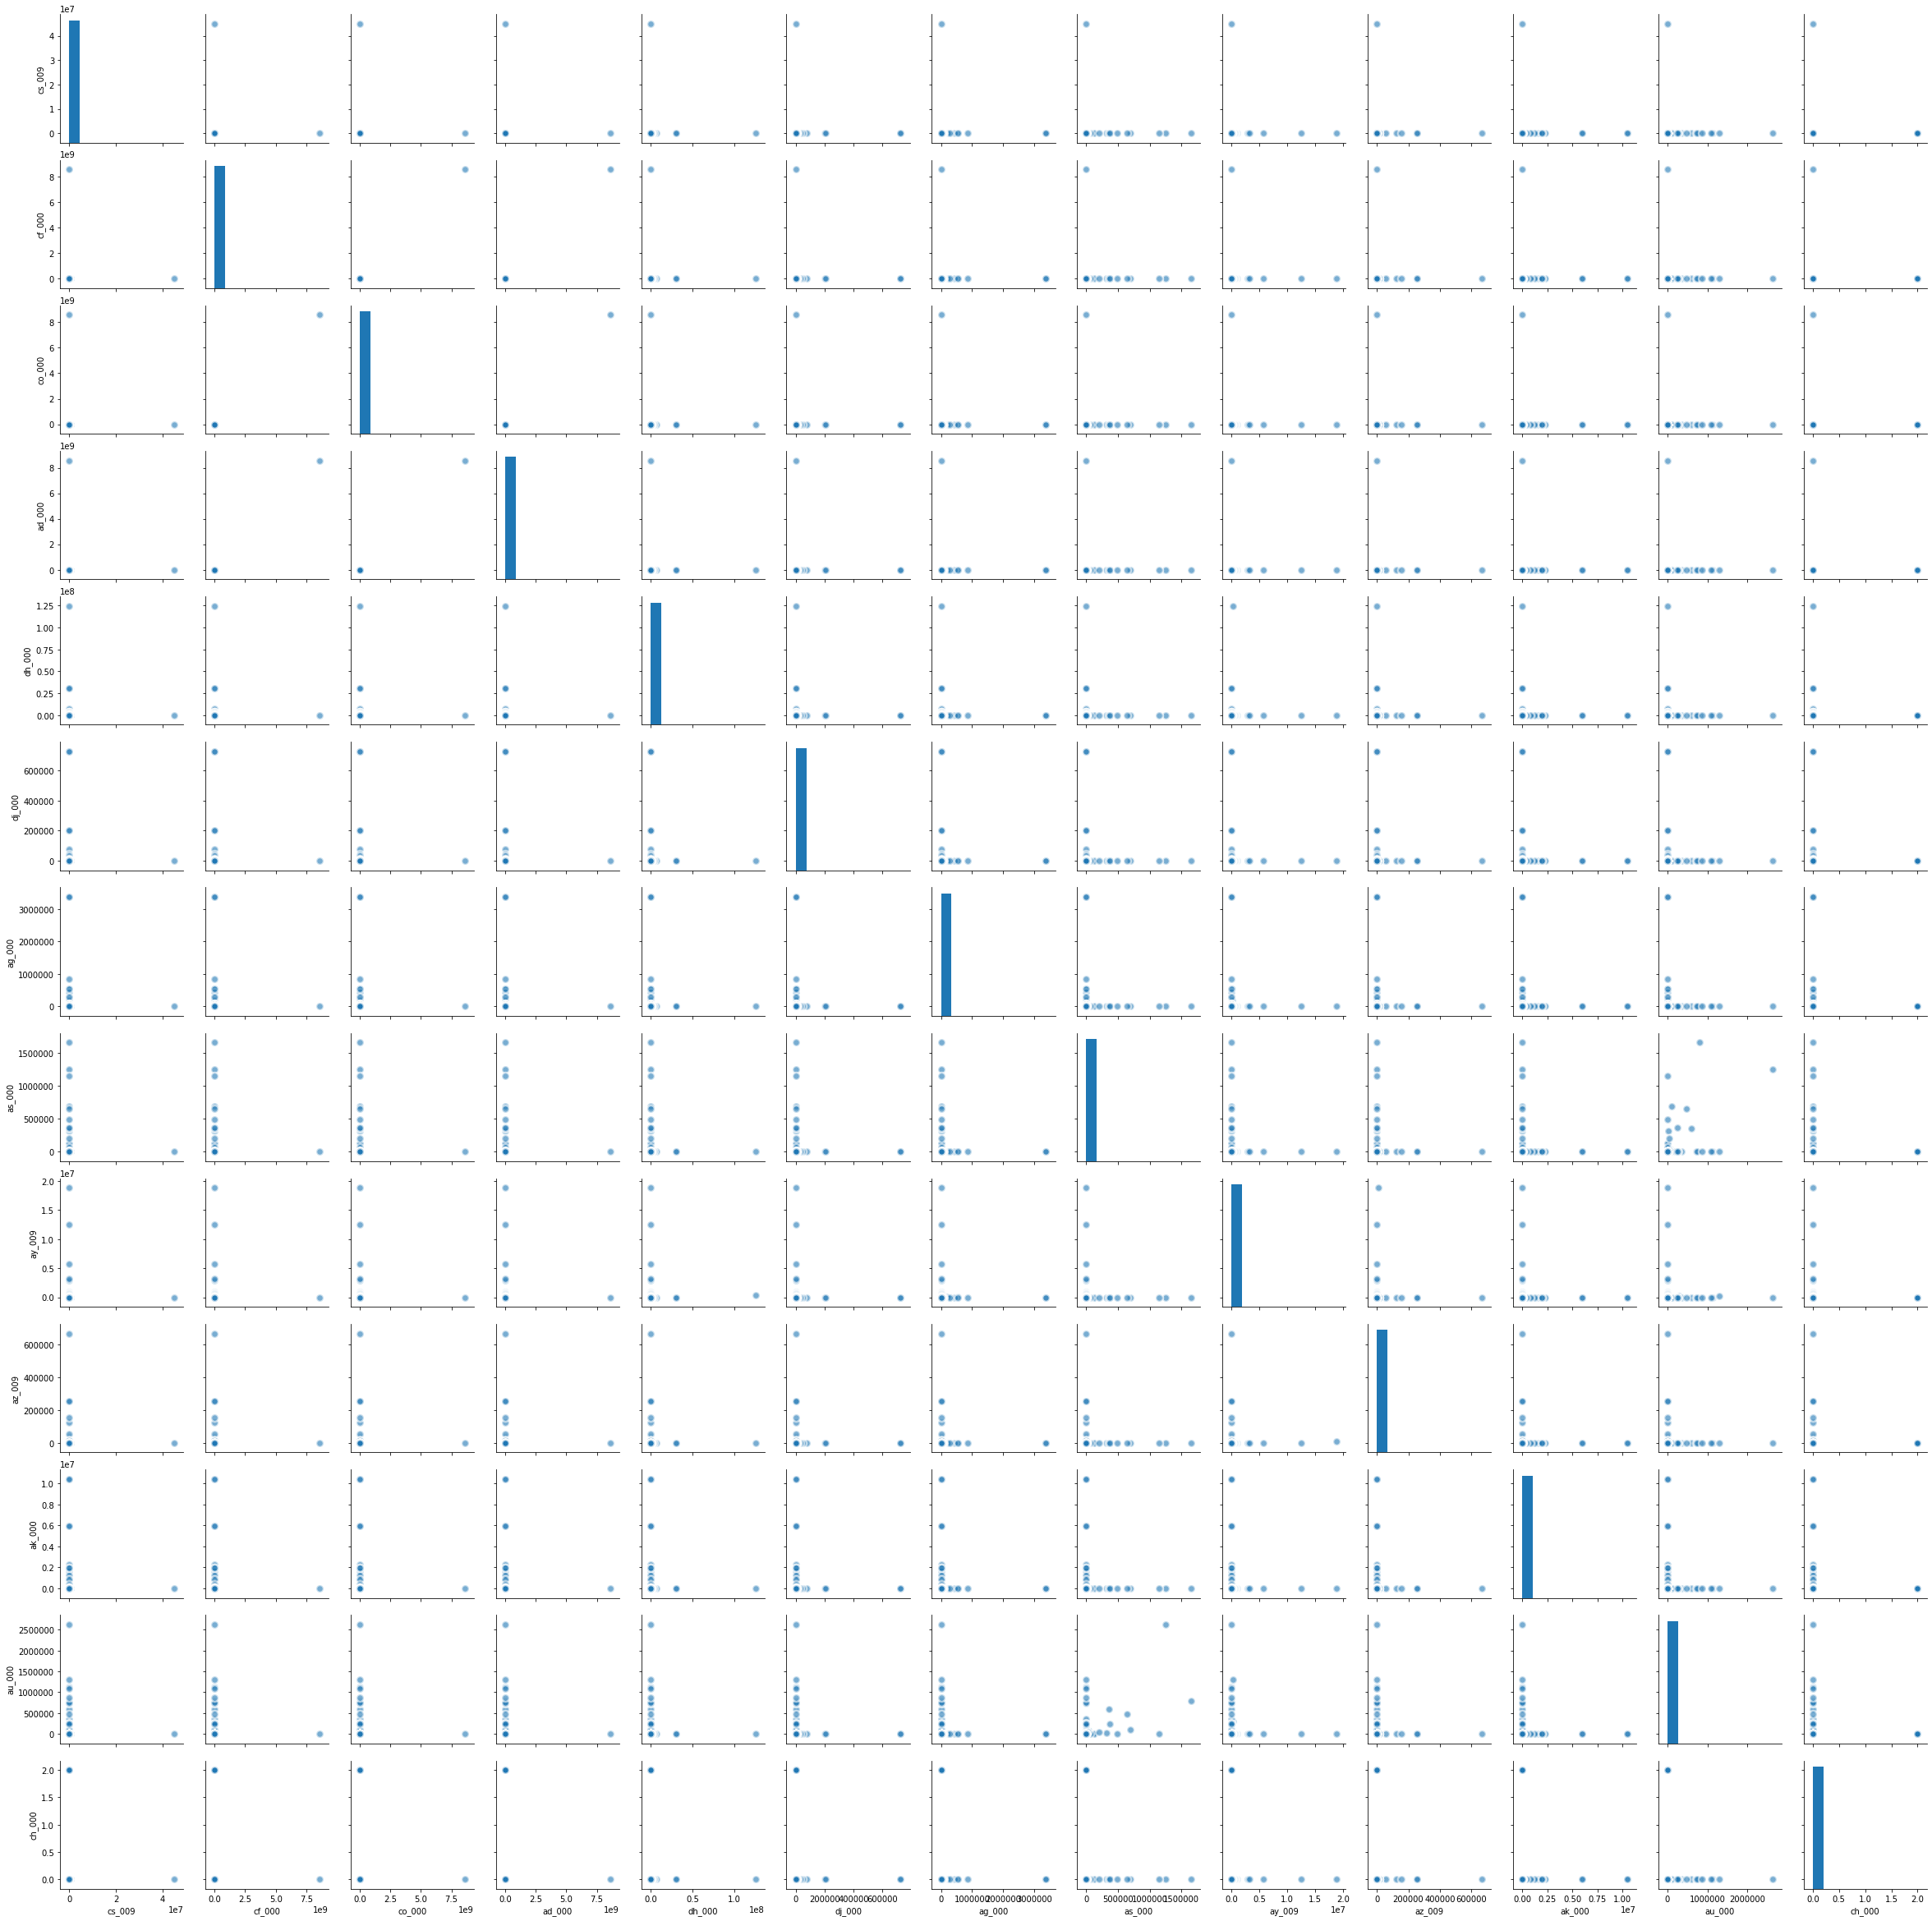

In [29]:
#Plotting scatterplots
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())

first_sqrt_170 = floor(sqrt(170))
cvResultIndexes = np.argsort(-cvResult)[:first_sqrt_170]
highestCVFeatureNames = np.array(list(data.columns.values))[cvResultIndexes]
renderData = X_data[highestCVFeatureNames]

sns.pairplot(renderData, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

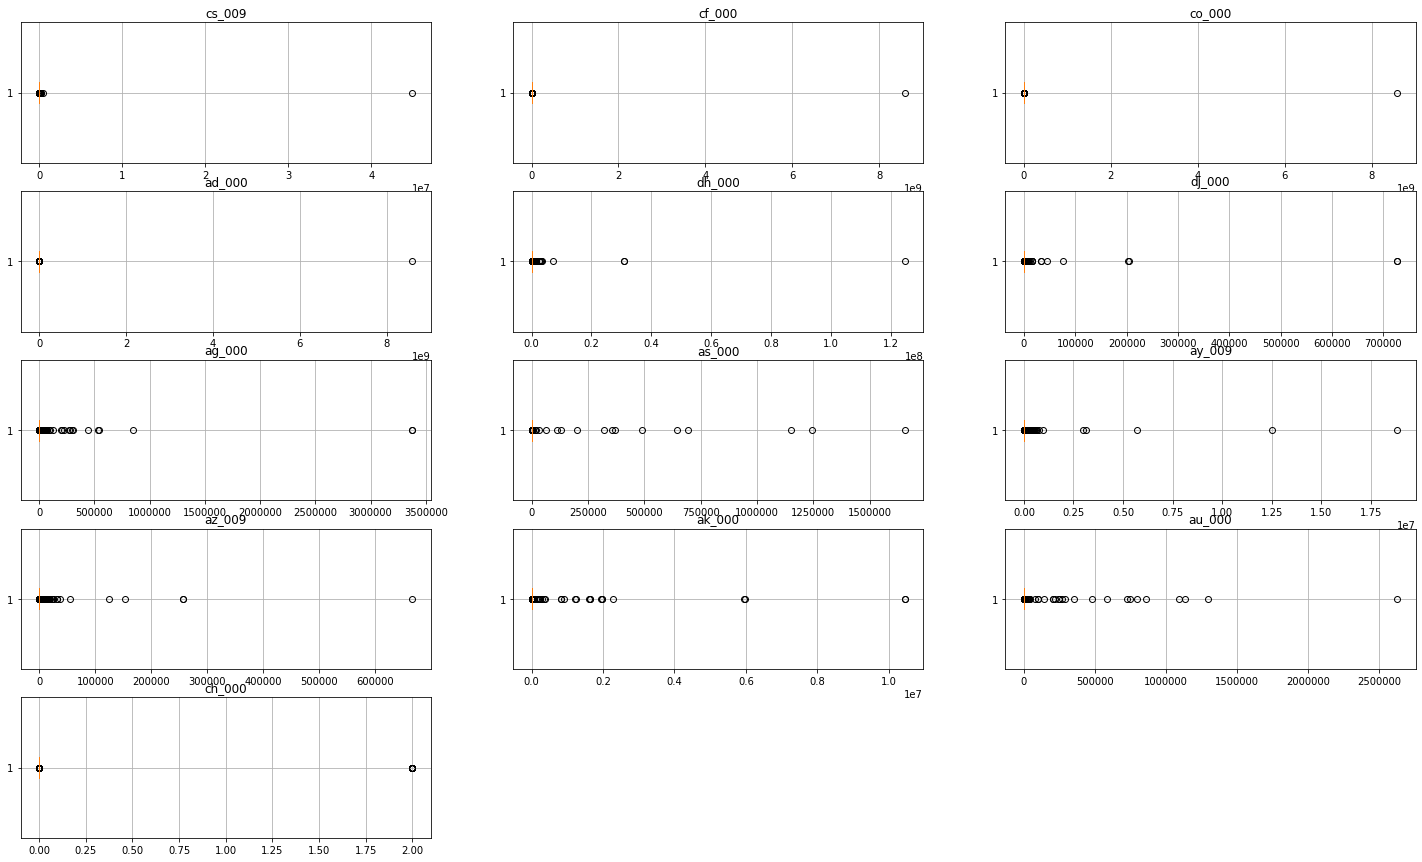

In [30]:
#Plotting Boxplots
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(25, 15))

index = 0
for a in range(0, 5):
    for b in range(0, 3):
        if index < 13:
            ax[a, b].boxplot(renderData.loc[:, highestCVFeatureNames[index]], whis=2, vert=False)
            ax[a, b].grid(True)
            ax[a, b].title.set_text(highestCVFeatureNames[index])
            b, index = b + 1, index + 1

ax[4, 1].remove()
ax[4, 2].remove()
plt.show()

2) b) v) Determine the number of positive and negative data. Is this data set imbal- anced?

In [31]:
#Method for Negative and Positive data
def count_neg_and_pos(y_data):
    y_value = to_binary_numeric(y_data)
    num_neg = np.count_nonzero(y_value)
    return len(y_value) - num_neg, num_neg

In [32]:
X_train, y_train = load_data(aps_train, skip_first_row=21, ycol_index=0,
                             assignedColNames=aps_columns, missingSymbol='na', 
                             needImpute=True,dropOrNot=False)

X_test, y_test = load_data(aps_test, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True,dropOrNot=False)

train_num_pos, train_num_neg = count_neg_and_pos(y_train)
test_num_pos, test_num_neg = count_neg_and_pos(y_test)
print("the number of pos data is : ", train_num_pos + test_num_pos)
print("the number of neg data is : ", train_num_neg + test_num_neg)#### v. Determine the number of positive and negative data. Is this data set imbalanced?

the number of pos data is :  1375
the number of neg data is :  74625


(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [35]:
# Loading aps train dataset
X_train, y_train = load_data(aps_train, skip_first_row=21, ycol_index=0,
                             assignedColNames=aps_columns, missingSymbol='na', 
                             needImpute=True,dropOrNot=True)

# Loading aps test dataset
X_test, y_test = load_data(aps_test, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True,dropOrNot=True)

y_train = to_binary_numeric(y_train, classNeg="neg")
y_test = to_binary_numeric(y_test, classNeg="neg")

randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train, y_train)
y_predict = randForestClf.predict(X_test)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict)

In [36]:
#Calculating Confusion Matrix
print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))


                 Predicted Negative  Predicted Positive
Actual Negative                 279                  96
Actual Positive                  22               15603


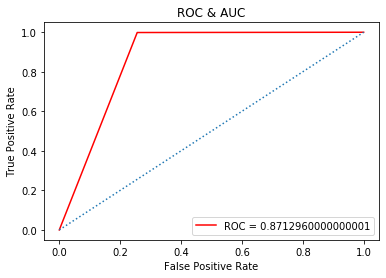

OOB Score is: 0.9935666666666667


In [37]:
#Computing Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("OOB Score is: " + str(randForestClf.oob_score_))

2) d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [38]:
smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train, y_train)
smote_test_fit = smote.fit_sample(X_test, y_test)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1].values, columns=['class'])
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1].values, columns=['class'])

print("-----------\"After Using SMOTE: (Train)\"-------------")
print(y_train_smote['class'].value_counts())
print("-----------\"After Using SMOTE: (Test)\"-------------")
print(y_test_smote['class'].value_counts())

randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train_smote, y_train_smote)
y_predict = randForestClf.predict(X_test_smote)

-----------"After Using SMOTE: (Train)"-------------
1    59000
0    59000
Name: class, dtype: int64
-----------"After Using SMOTE: (Test)"-------------
1    15625
0    15625
Name: class, dtype: int64


In [39]:
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict)
#compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

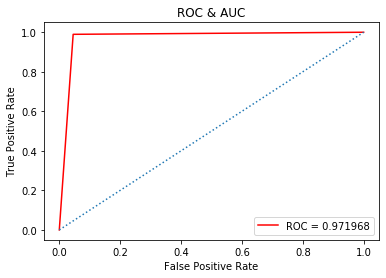

-----------"OOB Score"-------------
0.9966694915254237


In [40]:
#plotting ROC & AUC Curve
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

2) e) Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰃j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

Weka LMT without compensation train data (5-folds)

I1014 09:16:02.504039 10188 jvm.py:83] Adding bundled jars
I1014 09:16:02.514031 10188 jvm.py:90] Classpath=['F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'F:\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'F:\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
I1014 09:16:02.516031 10188 jvm.py:91] MaxHeapSize=default
I1014 09:16:02.517030 10188 jvm.py:100] Package support disabled


Train CV (5-folds) Error = 0.85%
=== Confusion Matrix ===

     a     b   <-- classified as
 58817   183 |     a = neg
   325   675 |     b = pos

================="Summary"====================

Correctly Classified Instances       59492               99.1533 %
Incorrectly Classified Instances       508                0.8467 %
Kappa statistic                          0.7223
Mean absolute error                      0.011 
Root mean squared error                  0.0829
Relative absolute error                 33.5704 %
Root relative squared error             64.7929 %
Total Number of Instances            60000     



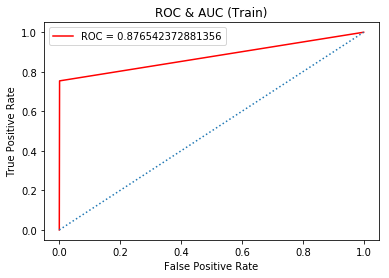

In [28]:
#Setting path for generated train data
gen_train_path = './gen_train.csv'
 
X_train, y_train = load_data(aps_train, skip_first_row=21, ycol_index=0,
                             assignedColNames=aps_columns, missingSymbol='na',
                             needImpute=True, dropOrNot=True)

export_train = pd.concat([y_train, X_train], axis=1)

# export data to csv
export_train.to_csv(gen_train_path, sep=',', index=False)
train_data = convert.load_any_file(filename=gen_train_path)
train_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_train_obj = Evaluation(train_data)
eval_train_obj.crossvalidate_model(classifier=log_tree, data=train_data, 
                                   num_folds=5, rnd=Random(1))
print("Train CV (5-folds) Error = %.2f%%" % (eval_train_obj.percent_incorrect))
print(eval_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_train_obj.summary())

log_tree.build_classifier(train_data)
y_predict = eval_train_obj.test_model(log_tree, train_data)

y_train = to_binary_numeric(y_train, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train, y_predict, pos_label=0)
#Compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

#Plotting ROC & AUC Curve
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Train)')
plt.legend()
plt.show()

Weka LMT without compensation test data (5-folds)

Test CV (5-folds) Error = 1.19%
=== Confusion Matrix ===

     a     b   <-- classified as
 15553    72 |     a = neg
   119   256 |     b = pos

================="Summary"====================

Correctly Classified Instances       15809               98.8063 %
Incorrectly Classified Instances       191                1.1938 %
Kappa statistic                          0.7222
Mean absolute error                      0.0158
Root mean squared error                  0.099 
Relative absolute error                 34.5681 %
Root relative squared error             65.4699 %
Total Number of Instances            16000     



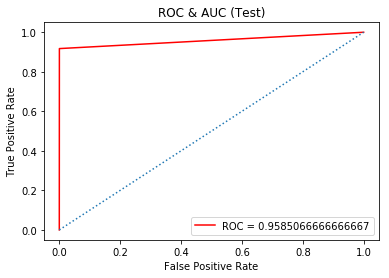

In [29]:
#Setting path for generated test data
gen_test_path = './gen_test.csv'

X_test, y_test = load_data(aps_test, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True,dropOrNot=True)

export_test = pd.concat([y_test, X_test], axis=1)

# export data to csv
export_test.to_csv(gen_test_path, sep=',', index=False)
test_data = convert.load_any_file(filename=gen_test_path)
test_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_test_obj = Evaluation(test_data)
eval_test_obj.crossvalidate_model(classifier=log_tree, data=test_data, num_folds=5, rnd=Random(1))
print("Test CV (5-folds) Error = %.2f%%" % (eval_test_obj.percent_incorrect))
print(eval_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_test_obj.summary())

log_tree.build_classifier(test_data)
y_predict = eval_test_obj.test_model(log_tree, test_data)

y_test = to_binary_numeric(y_test, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict, pos_label=0)
#Compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

#Plotting ROC & AUC Curve
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Test)')
plt.legend()
plt.show()

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE

Weka LMT without compensation SMOTE train data (5-folds)

SMOTE Train CV (5-folds) Error = 1.52%
=== Confusion Matrix ===

     a     b   <-- classified as
 57991  1009 |     a = neg
   781 58219 |     b = pos

================="Summary"====================

Correctly Classified Instances      116210               98.4831 %
Incorrectly Classified Instances      1790                1.5169 %
Kappa statistic                          0.9697
Mean absolute error                      0.0249
Root mean squared error                  0.1131
Relative absolute error                  4.9895 %
Root relative squared error             22.6242 %
Total Number of Instances           118000     



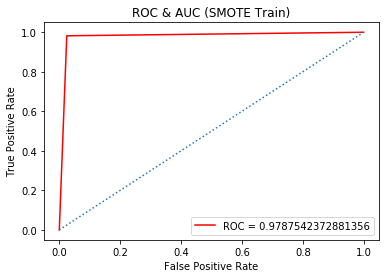

In [30]:
#Setting path for generated smote train data
gen_smote_train_path = './gen_smote_train.csv'

X_train, y_train = load_data(aps_train, skip_first_row=21, ycol_index=0,
                             assignedColNames=aps_columns, missingSymbol='na',
                             needImpute=True, dropOrNot=True)

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train, y_train)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1].values, columns=['class'])
export_smote_train_data = pd.concat([y_train_smote, X_train_smote], axis=1)

# export data to csv
export_smote_train.to_csv(gen_smote_train_path, sep=',', index=False)
smote_train = convert.load_any_file(filename=gen_smote_train_path)
smote_train.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_train_obj = Evaluation(smote_train)
eval_smote_train_obj.crossvalidate_model(classifier=log_tree, data=smote_train, 
                                         num_folds=5, rnd=Random(1))
print("SMOTE Train CV (5-folds) Error = %.2f%%" % (eval_smote_train_obj.percent_incorrect))
print(eval_smote_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_train_obj.summary())

log_tree.build_classifier(smote_train)
y_predict = eval_smote_train_obj.test_model(log_tree, smote_train)

y_train_smote = to_binary_numeric(y_train_smote, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train_smote, y_predict, pos_label=0)
#compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

#Plotting ROC & AUC Curve
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Train)')
plt.legend()
plt.show()

Weka LMT without compensation SMOTE test data (5-folds)

SMOTE Test CV (5-folds) Error = 1.67%
=== Confusion Matrix ===

     a     b   <-- classified as
 15348   277 |     a = neg
   244 15381 |     b = pos

================="Summary"====================

Correctly Classified Instances       30729               98.3328 %
Incorrectly Classified Instances       521                1.6672 %
Kappa statistic                          0.9667
Mean absolute error                      0.03  
Root mean squared error                  0.1178
Relative absolute error                  6.0019 %
Root relative squared error             23.5575 %
Total Number of Instances            31250     



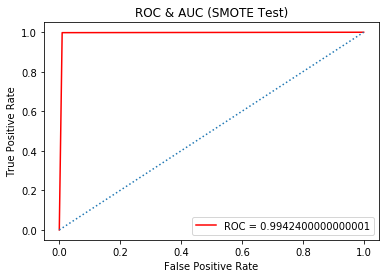

In [32]:
#Setting path for generated smote test data
gen_smote_test_path = './gen_smote_test.csv'

X_test, y_test = load_data(aps_test, skip_first_row=21, ycol_index=0,
                           assignedColNames=aps_columns, missingSymbol='na', 
                           needImpute=True, dropOrNot=True)

smote = SMOTE(random_state=2333)
smote_test_fit = smote.fit_sample(X_test, y_test)
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1].values, columns=['class'])
export_smote_test = pd.concat([y_test_smote, X_test_smote], axis=1)

# export data to csv
export_smote_test.to_csv(gen_smote_test_path, sep=',', index=False)
smote_test = convert.load_any_file(filename=gen_smote_test_path)
smote_test.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_test_obj = Evaluation(smote_test)
eval_smote_test_obj.crossvalidate_model(classifier=log_tree, data=smote_test, 
                                        num_folds=5, rnd=Random(1))
print("SMOTE Test CV (5-folds) Error = %.2f%%" % (eval_smote_test_obj.percent_incorrect))
print(eval_smote_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_test_obj.summary())

log_tree.build_classifier(smote_test)
y_predict = eval_smote_test_obj.test_model(log_tree, smote_test)

y_test_smote = to_binary_numeric(y_test_smote, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict, pos_label=0)
#Compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

#Plotting ROC & AUC Curve
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Test)')
plt.legend()
plt.show()